In [48]:
#Librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [49]:
#Configuracion de la visualizacion
%matplotlib inline 
#%matplotlib tk 
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6) # tamano de las figuras

1. Cargar datos

In [50]:
df_titanic = pd.read_csv('/data/dataset_titanic/train.csv')

In [51]:
if 'df_titanic' in locals():
    print("Tamaño del dataset (filas, columnas):", df_titanic.shape)
    print("Impresion de las primeras 5 filas del dataset:")
    print(df_titanic.head())
   

Tamaño del dataset (filas, columnas): (891, 12)
Impresion de las primeras 5 filas del dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0     

2. Inspección inicial de datos

In [52]:
print("Inforamción General del dataset:")
print(df_titanic.info())

Inforamción General del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [53]:
print("Estadistica Descriptiva del dataset de columnas numéricas:")
print(df_titanic.describe())

Estadistica Descriptiva del dataset de columnas numéricas:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [54]:
print("\nEstadísticas descriptivas para columnas categóricas (object):")
print(df_titanic.describe(include=['object', 'category']))


Estadísticas descriptivas para columnas categóricas (object):
                       Name   Sex  Ticket Cabin Embarked
count                   891   891     891   204      889
unique                  891     2     681   147        3
top     Dooley, Mr. Patrick  male  347082    G6        S
freq                      1   577       7     4      644


3. Limpieza de datos

In [55]:
print("\nConteo de valores perdidos por columna:")
print(df_titanic.isnull().sum())


Conteo de valores perdidos por columna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


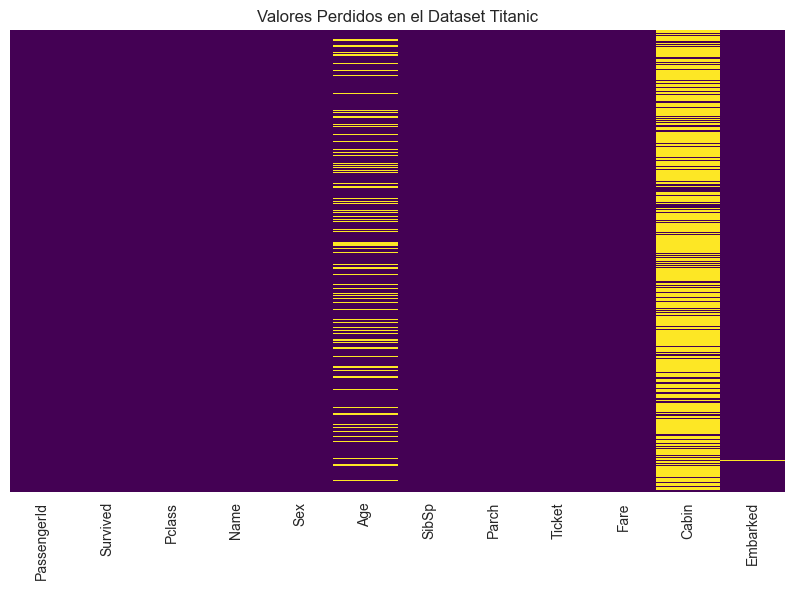

In [56]:
# Visualización de valores perdidos
sns.heatmap(df_titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Valores Perdidos en el Dataset Titanic')
plt.show()

In [57]:
# Estrategias para 'Age':
# Opción 1: Imputar con la mediana (más robusta a outliers que la media)
median_age = df_titanic['Age'].median()
df_titanic['Age'].fillna(median_age, inplace=True)
print(f"\nValores perdidos en 'Age' imputados con la mediana ({median_age}).")


Valores perdidos en 'Age' imputados con la mediana (28.0).


C:\Users\ASUS Vivobook\AppData\Local\Temp\ipykernel_10712\238455212.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['Age'].fillna(median_age, inplace=True)


In [58]:
 # Estrategias para 'Embarked':
# Opción 1: Imputar con la moda (es categórica)
mode_embarked = df_titanic['Embarked'].mode()[0] # mode() puede devolver múltiples modas
df_titanic['Embarked'].fillna(mode_embarked, inplace=True)
print(f"Valores perdidos en 'Embarked' imputados con la moda ({mode_embarked}).")

# Estrategias para 'Cabin':
# Tiene demasiados valores perdidos. Podríamos eliminarla o crear una característica 'HasCabin'.
df_titanic.drop('Cabin', axis=1, inplace=True)
print("Columna 'Cabin' eliminada debido a alto porcentaje de valores perdidos.")
# Alternativa: df_titanic['HasCabin'] = df_titanic['Cabin'].notnull().astype(int)

print("\nConteo de valores perdidos después del tratamiento:")
print(df_titanic.isnull().sum())

Valores perdidos en 'Embarked' imputados con la moda (S).
Columna 'Cabin' eliminada debido a alto porcentaje de valores perdidos.

Conteo de valores perdidos después del tratamiento:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\ASUS Vivobook\AppData\Local\Temp\ipykernel_10712\3496657010.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['Embarked'].fillna(mode_embarked, inplace=True)


3.1 Manejo de Outliers

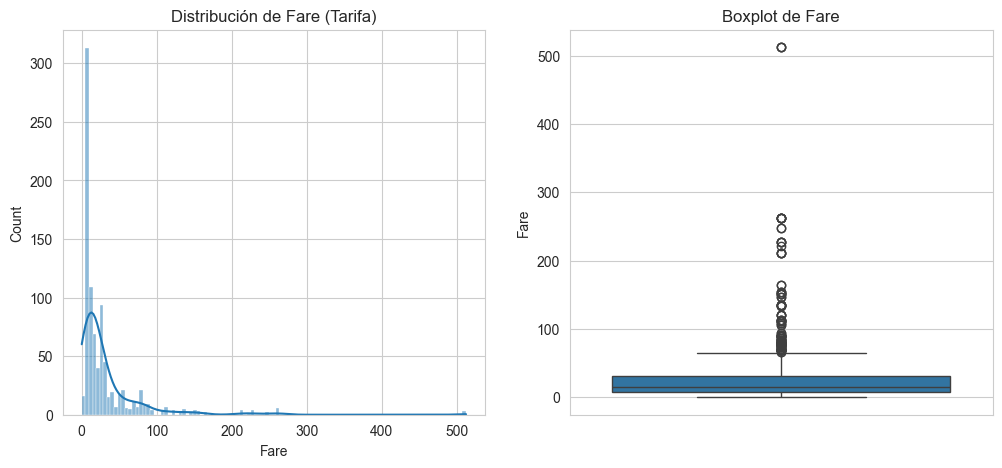


Límites para outliers en 'Fare': Inferior=-26.72, Superior=65.63
Número de outliers detectados en 'Fare': 116


In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_titanic['Fare'], kde=True)
plt.title('Distribución de Fare (Tarifa)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_titanic['Fare'])
plt.title('Boxplot de Fare')
plt.show()

# Identificación de outliers usando IQR para 'Fare'
Q1_fare = df_titanic['Fare'].quantile(0.25)
Q3_fare = df_titanic['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare
lower_bound_fare = Q1_fare - 1.5 * IQR_fare
upper_bound_fare = Q3_fare + 1.5 * IQR_fare

print(f"\nLímites para outliers en 'Fare': Inferior={lower_bound_fare:.2f}, Superior={upper_bound_fare:.2f}")
outliers_fare = df_titanic[(df_titanic['Fare'] < lower_bound_fare) | (df_titanic['Fare'] > upper_bound_fare)]
print(f"Número de outliers detectados en 'Fare': {len(outliers_fare)}")

    # Opciones para tratar outliers en 'Fare' (para este ejemplo, no los modificaremos drásticamente,
    # pero en un proyecto real se evaluaría):
    # 1. Capping:
    # df_titanic['Fare'] = np.where(df_titanic['Fare'] > upper_bound_fare, upper_bound_fare, df_titanic['Fare'])
    # 2. Transformación (logarítmica, si la distribución es muy asimétrica):
    # df_titanic['Fare_log'] = np.log1p(df_titanic['Fare']) # log1p para manejar ceros

Paso 4: Transformación de Datos

Ingeniería de Características (Feature Engineering)

In [60]:
if 'df_titanic' in locals():
    # Crear 'FamilySize'
    df_titanic['FamilySize'] = df_titanic['SibSp'] + df_titanic['Parch'] + 1 # +1 para incluir al propio pasajero

    # Crear 'IsAlone'
    df_titanic['IsAlone'] = 0
    df_titanic.loc[df_titanic['FamilySize'] == 1, 'IsAlone'] = 1

    # Extraer 'Title' del nombre
    df_titanic['Title'] = df_titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    # Simplificar títulos
    df_titanic['Title'] = df_titanic['Title'].replace(['Lady', 'Countess','Capt', 'Col', \
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df_titanic['Title'] = df_titanic['Title'].replace('Mlle', 'Miss')
    df_titanic['Title'] = df_titanic['Title'].replace('Ms', 'Miss')
    df_titanic['Title'] = df_titanic['Title'].replace('Mme', 'Mrs')

    print("\nNuevas características creadas: 'FamilySize', 'IsAlone', 'Title'")
    print(df_titanic[['Name', 'Title', 'FamilySize', 'IsAlone']].head())
    print("\nConteo de Títulos:")
    print(df_titanic['Title'].value_counts())


Nuevas características creadas: 'FamilySize', 'IsAlone', 'Title'
                                                Name Title  FamilySize  \
0                            Braund, Mr. Owen Harris    Mr           2   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs           2   
2                             Heikkinen, Miss. Laina  Miss           1   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs           2   
4                           Allen, Mr. William Henry    Mr           1   

   IsAlone  
0        0  
1        0  
2        1  
3        0  
4        1  

Conteo de Títulos:
Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64


<>:10: SyntaxWarning: invalid escape sequence '\.'
<>:10: SyntaxWarning: invalid escape sequence '\.'
C:\Users\ASUS Vivobook\AppData\Local\Temp\ipykernel_10712\2727255295.py:10: SyntaxWarning: invalid escape sequence '\.'
  df_titanic['Title'] = df_titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


Discretización (Binning - Ejemplo con 'Age')

In [61]:
if 'df_titanic' in locals():
    # Crear grupos de edad
    bins_age = [0, 12, 18, 35, 60, 100] # Definir los límites de los bins
    labels_age = ['Child', 'Teenager', 'YoungAdult', 'Adult', 'Senior']
    df_titanic['AgeGroup'] = pd.cut(df_titanic['Age'], bins=bins_age, labels=labels_age, right=False)
    print("\n'Age' discretizada en 'AgeGroup':")
    print(df_titanic[['Age', 'AgeGroup']].head())


'Age' discretizada en 'AgeGroup':
    Age    AgeGroup
0  22.0  YoungAdult
1  38.0       Adult
2  26.0  YoungAdult
3  35.0       Adult
4  35.0       Adult


Codificación de Variables Categóricas

In [62]:
if 'df_titanic' in locals():
    # Label Encoding para 'Title' (si consideramos un orden implícito o para algunos modelos basados en árboles)
    # O One-Hot Encoding si no hay orden. Para simplificar, usemos One-Hot para todo lo nominal.
    # le_title = LabelEncoder()
    # df_titanic['Title_Encoded'] = le_title.fit_transform(df_titanic['Title'])

    # One-Hot Encoding para 'Sex', 'Embarked', 'Title', 'AgeGroup'
    # (Eliminar columnas originales después de la codificación si no se van a usar)
    df_titanic = pd.get_dummies(df_titanic, columns=['Sex', 'Embarked', 'Title', 'AgeGroup'], drop_first=True)
    # drop_first=True ayuda a evitar multicolinealidad para modelos lineales

    print("\nDataset después de One-Hot Encoding (primeras filas y nuevas columnas):")
    print(df_titanic.head())
    df_titanic.info() # Ver las nuevas columnas


Dataset después de One-Hot Encoding (primeras filas y nuevas columnas):
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare  FamilySize  ...  Embarked_Q  Embarked_S  \
0         A/5 21171   7.2500           2  ...       False        True   
1          PC 17599  71.2833           2  ...       False       False   
2  STON/O2. 3101282   7.9250      

5. Normalización / Estandarización

In [63]:
if 'df_titanic' in locals():
    cols_to_scale = ['Age', 'Fare', 'FamilySize', 'SibSp', 'Parch'] # Pclass es ordinal, a veces se escala, a veces no.

    # Estandarización
    scaler_std = StandardScaler()
    df_titanic_scaled_std = df_titanic.copy() # Copiar para no modificar el original directamente para esta demo
    df_titanic_scaled_std[cols_to_scale] = scaler_std.fit_transform(df_titanic[cols_to_scale])
    print("\nDataset con columnas numéricas ESTANDARIZADAS (ej. 'Age', 'Fare'):")
    print(df_titanic_scaled_std[cols_to_scale].describe())

    # Normalización (Min-Max)
    scaler_mm = MinMaxScaler()
    df_titanic_scaled_mm = df_titanic.copy()
    df_titanic_scaled_mm[cols_to_scale] = scaler_mm.fit_transform(df_titanic[cols_to_scale])
    print("\nDataset con columnas numéricas NORMALIZADAS (ej. 'Age', 'Fare'):")
    print(df_titanic_scaled_mm[cols_to_scale].describe())

    # Para el EDA posterior, usualmente usamos los datos ANTES de la escala final,
    # o el escalado se hace como parte del pipeline de modelado.
    # Para este EDA, continuaremos con df_titanic (con nuevas features pero sin escalar 'Age', 'Fare' etc.)
    # o podemos usar df_titanic_scaled_std si queremos ver el impacto en algunas visualizaciones.
    # ¡La elección depende del objetivo!


Dataset con columnas numéricas ESTANDARIZADAS (ej. 'Age', 'Fare'):
                Age          Fare    FamilySize         SibSp         Parch
count  8.910000e+02  8.910000e+02  8.910000e+02  8.910000e+02  8.910000e+02
mean   2.272780e-16  3.987333e-18 -2.392400e-17  4.386066e-17  5.382900e-17
std    1.000562e+00  1.000562e+00  1.000562e+00  1.000562e+00  1.000562e+00
min   -2.224156e+00 -6.484217e-01 -5.609748e-01 -4.745452e-01 -4.736736e-01
25%   -5.657365e-01 -4.891482e-01 -5.609748e-01 -4.745452e-01 -4.736736e-01
50%   -1.046374e-01 -3.573909e-01 -5.609748e-01 -4.745452e-01 -4.736736e-01
75%    4.333115e-01 -2.424635e-02  5.915988e-02  4.327934e-01 -4.736736e-01
max    3.891554e+00  9.667167e+00  5.640372e+00  6.784163e+00  6.974147e+00

Dataset con columnas numéricas NORMALIZADAS (ej. 'Age', 'Fare'):
              Age        Fare  FamilySize       SibSp       Parch
count  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.363679    0.062858    0.090460    0.065

6 Análisis Exploratorio de Datos (EDA)

Usaremos df_titanic (el que tiene las nuevas características pero antes de la estandarización/normalización de Age, Fare, etc., para una interpretación más directa de las unidades originales en los gráficos).

Análisis Univaruiado

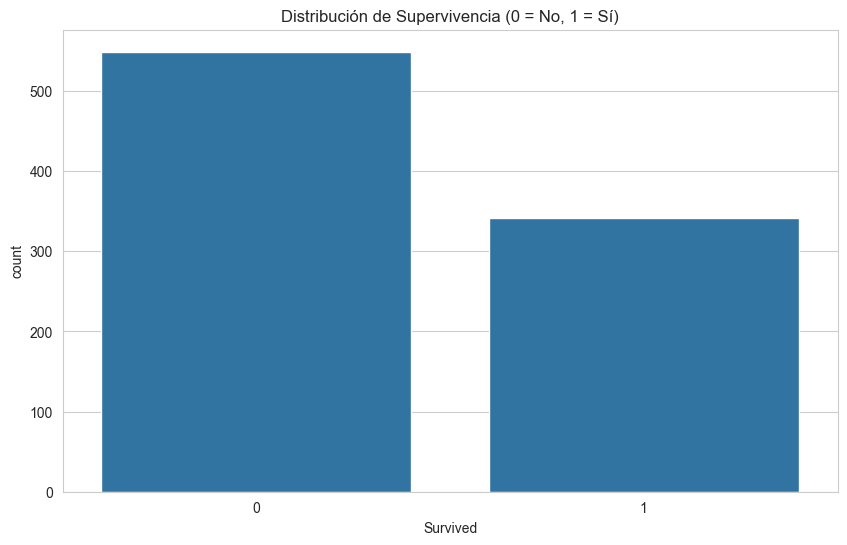

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


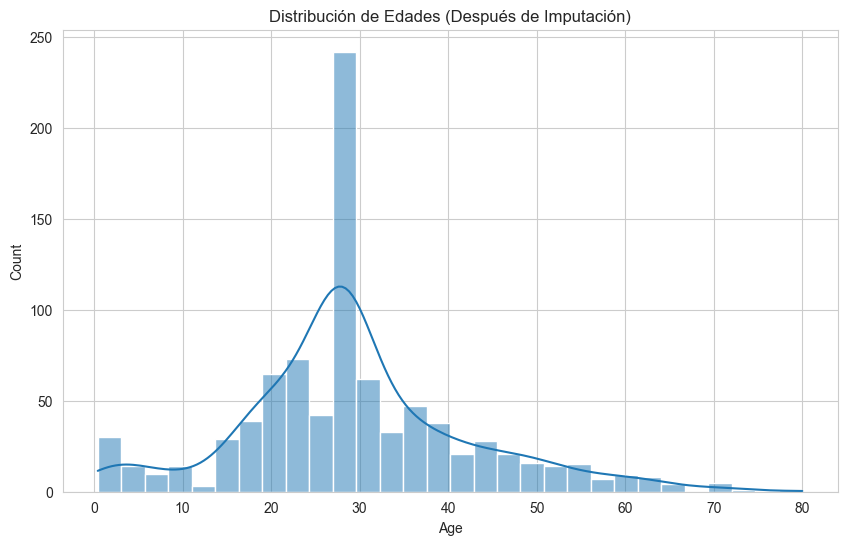

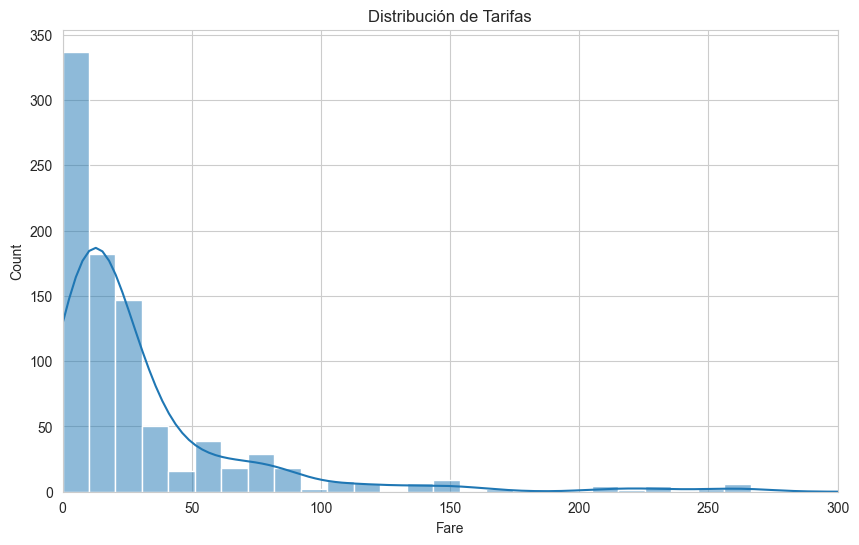

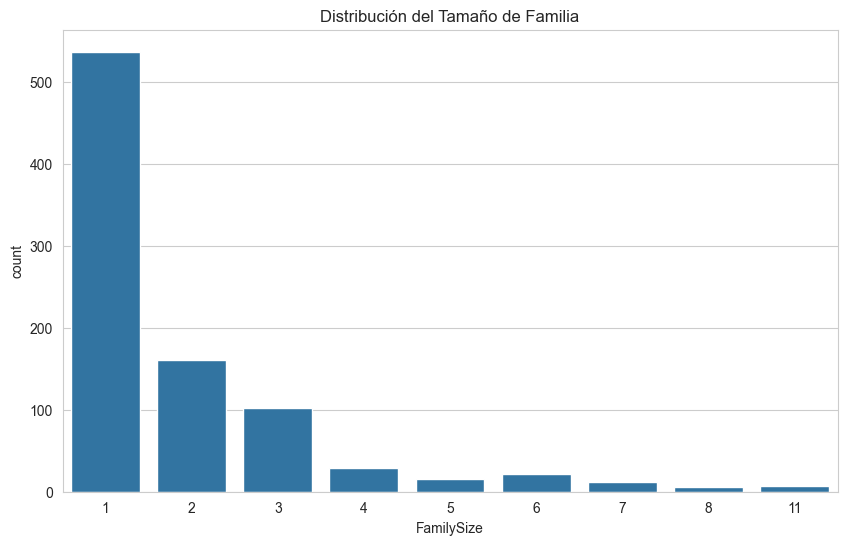

In [64]:
if 'df_titanic' in locals():
    # Variable objetivo: 'Survived'
    sns.countplot(x='Survived', data=df_titanic)
    plt.title('Distribución de Supervivencia (0 = No, 1 = Sí)')
    plt.show()
    print(df_titanic['Survived'].value_counts(normalize=True))

    # Variables numéricas clave (ya vimos 'Age' y 'Fare' en outliers)
    sns.histplot(df_titanic['Age'], kde=True, bins=30)
    plt.title('Distribución de Edades (Después de Imputación)')
    plt.show()

    sns.histplot(df_titanic['Fare'], kde=True, bins=50)
    plt.title('Distribución de Tarifas')
    plt.xlim(0, 300) # Limitar para mejor visualización, ya que hay outliers
    plt.show()

    # Variables categóricas creadas (ej. 'FamilySize')
    sns.countplot(x='FamilySize', data=df_titanic)
    plt.title('Distribución del Tamaño de Familia')
    plt.show()

Análisis Bivariado (enfocado en la relación con 'Survived')

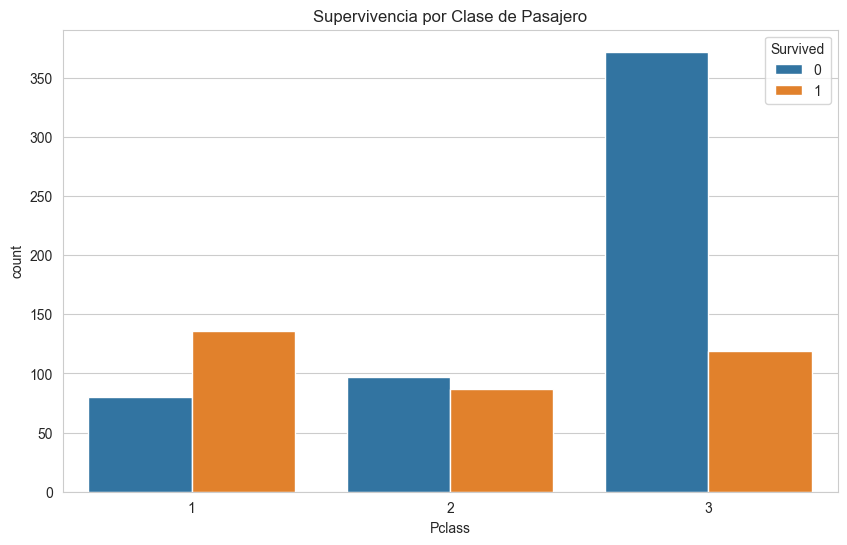

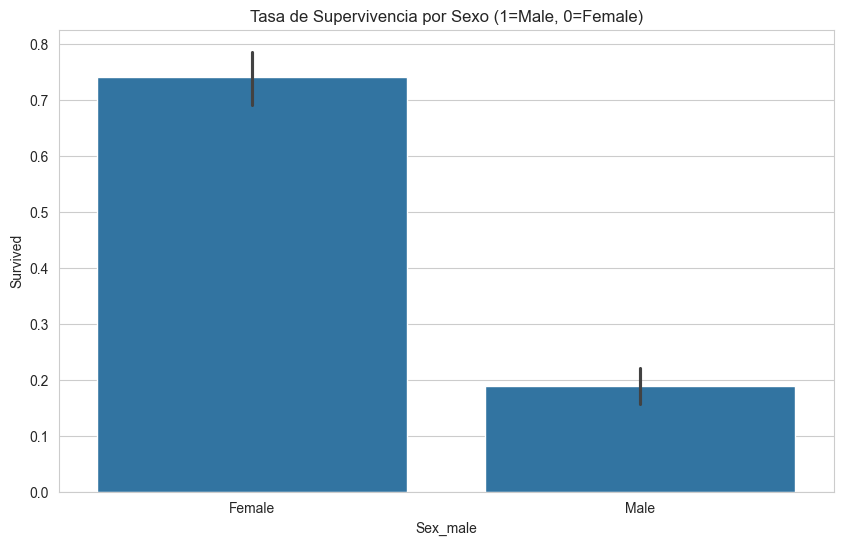

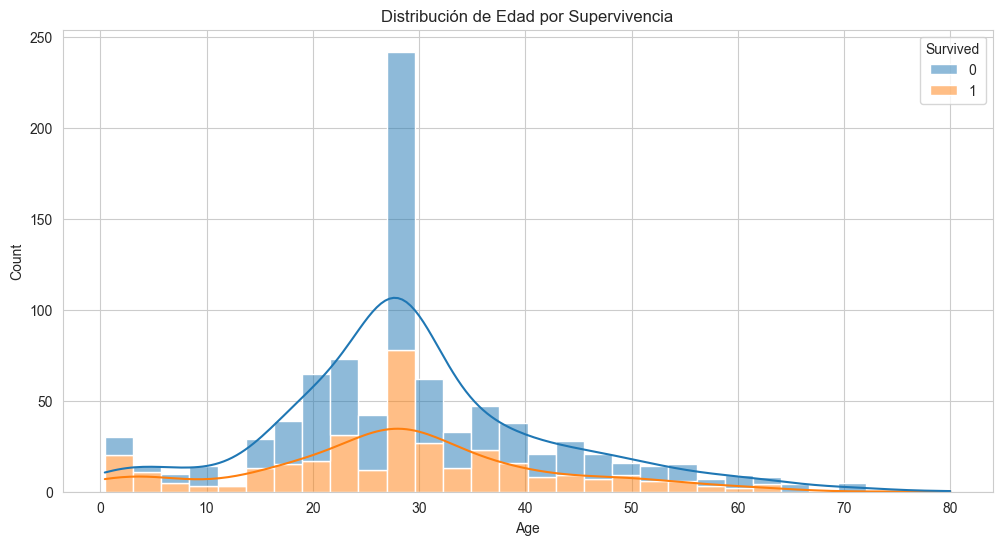

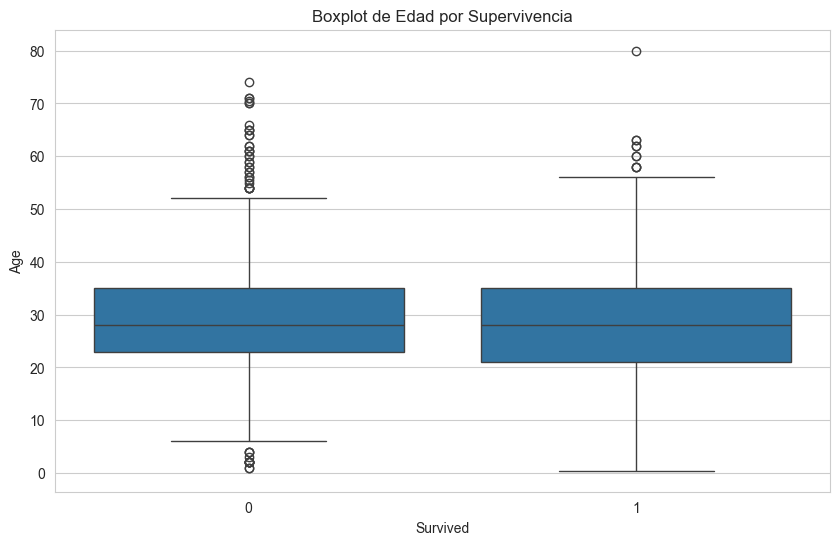

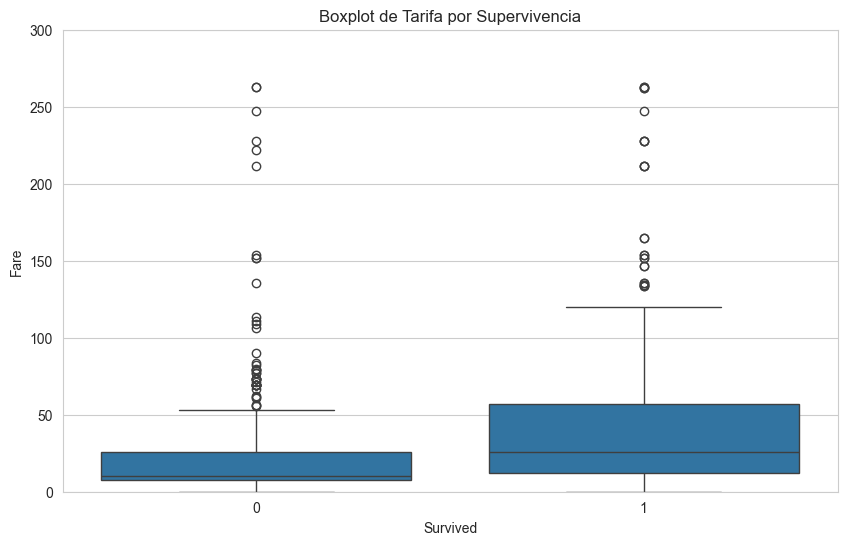

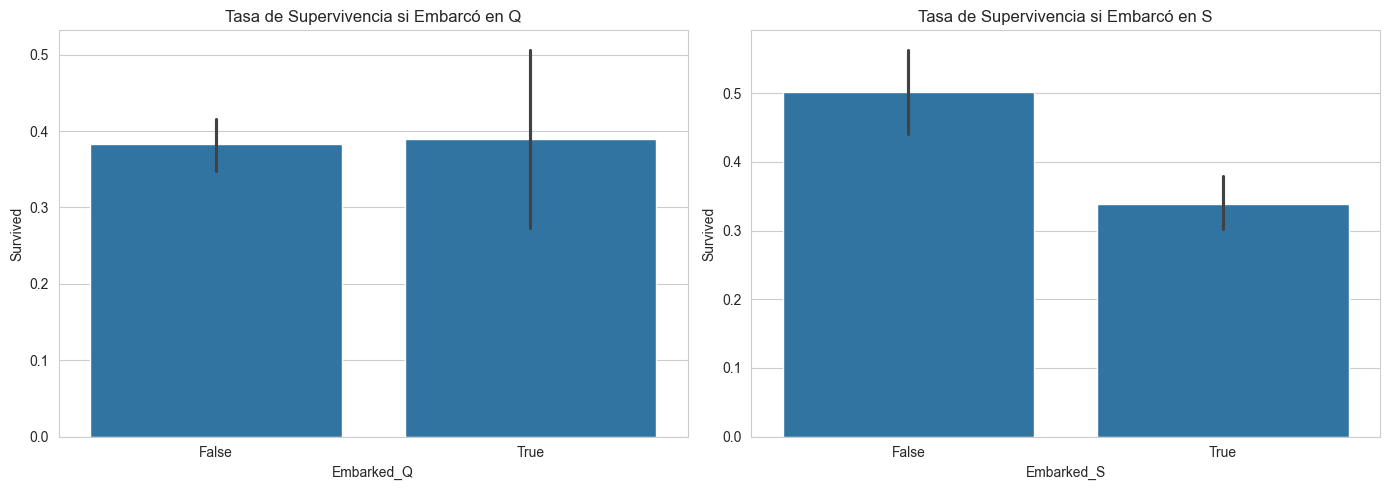

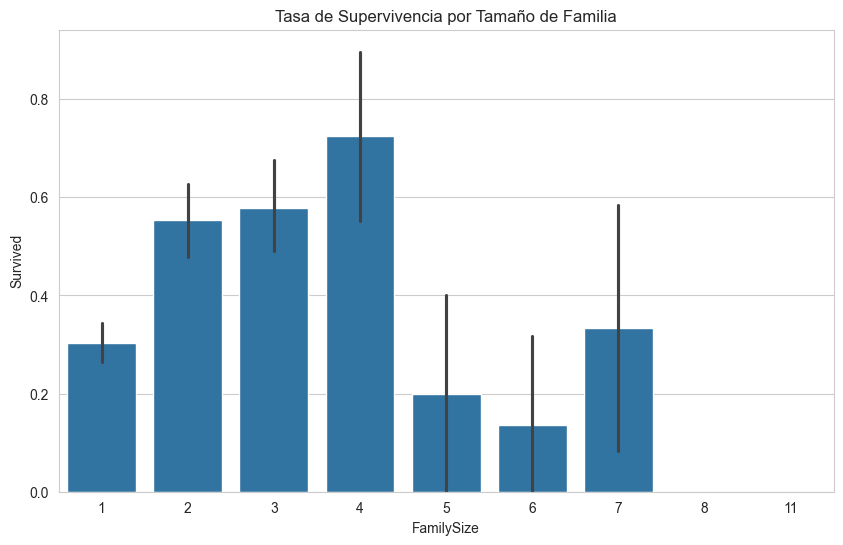

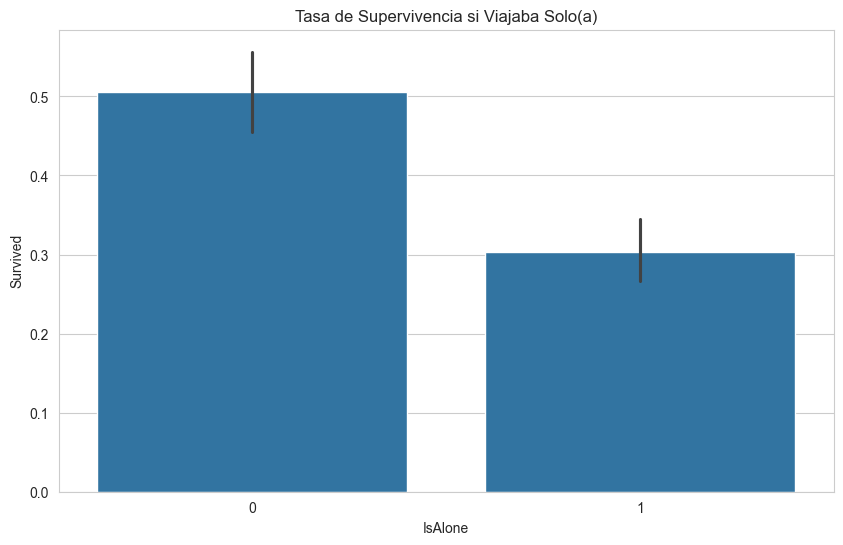

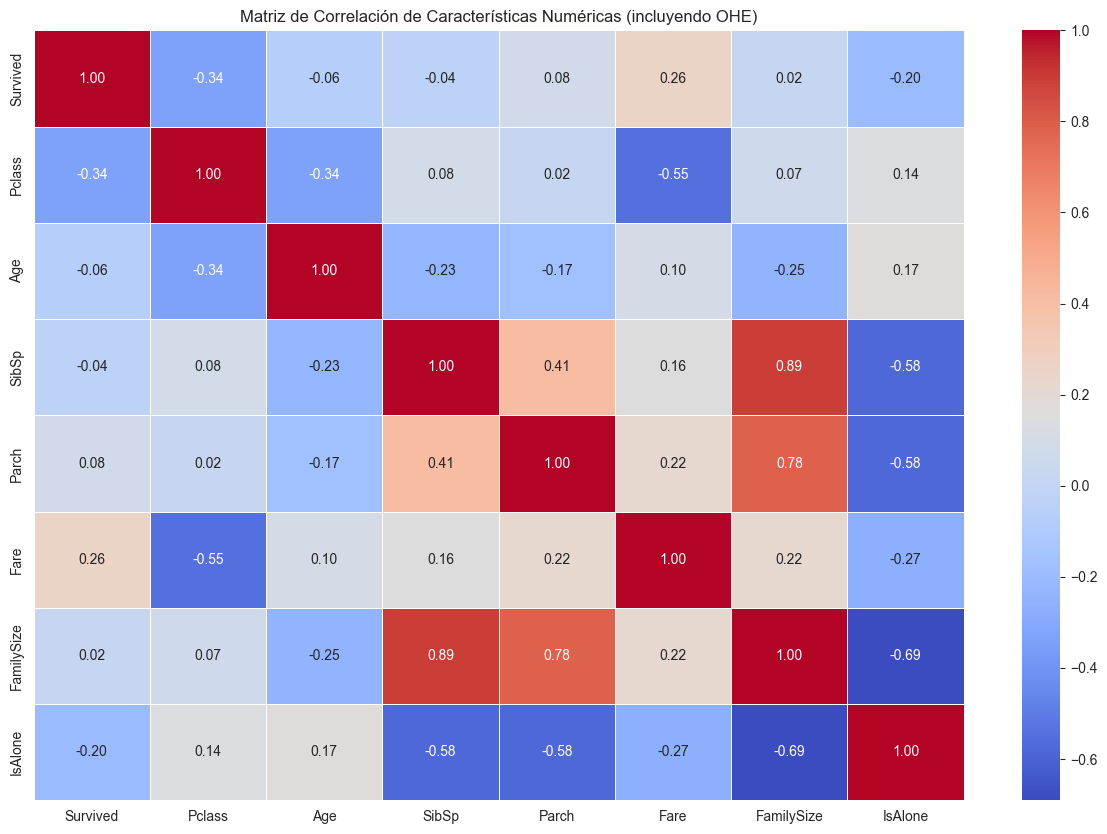

In [65]:
if 'df_titanic' in locals():
    # Supervivencia vs. Clase (Pclass)
    sns.countplot(x='Pclass', hue='Survived', data=df_titanic)
    plt.title('Supervivencia por Clase de Pasajero')
    plt.show()

    # Supervivencia vs. Sexo (ya codificado, usamos Sex_male)
    # Antes de la codificación: sns.countplot(x='Sex', hue='Survived', data=df_original_titanic)
    # Después:
    if 'Sex_male' in df_titanic.columns:
        sns.barplot(x='Sex_male', y='Survived', data=df_titanic) # 1 es male, 0 es female
        plt.title('Tasa de Supervivencia por Sexo (1=Male, 0=Female)')
        plt.xticks([0,1], ['Female', 'Male'])
        plt.show()


    # Supervivencia vs. Edad
    plt.figure(figsize=(12,6))
    sns.histplot(data=df_titanic, x='Age', hue='Survived', kde=True, multiple="stack")
    plt.title('Distribución de Edad por Supervivencia')
    plt.show()

    sns.boxplot(x='Survived', y='Age', data=df_titanic)
    plt.title('Boxplot de Edad por Supervivencia')
    plt.show()

    # Supervivencia vs. Tarifa
    sns.boxplot(x='Survived', y='Fare', data=df_titanic)
    plt.title('Boxplot de Tarifa por Supervivencia')
    plt.ylim(0, 300) # Limitar para visualización
    plt.show()

    # Supervivencia vs. Puerto de Embarque (ya codificado)
    # Antes de codificar: sns.countplot(x='Embarked', hue='Survived', data=df_original_titanic)
    # Después (ejemplo con Embarked_Q y Embarked_S, la base es C):
    if 'Embarked_Q' in df_titanic.columns and 'Embarked_S' in df_titanic.columns:
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        sns.barplot(x='Embarked_Q', y='Survived', data=df_titanic, ax=axes[0])
        axes[0].set_title('Tasa de Supervivencia si Embarcó en Q')
        sns.barplot(x='Embarked_S', y='Survived', data=df_titanic, ax=axes[1])
        axes[1].set_title('Tasa de Supervivencia si Embarcó en S')
        plt.tight_layout()
        plt.show()

    # Supervivencia vs. FamilySize
    sns.barplot(x='FamilySize', y='Survived', data=df_titanic)
    plt.title('Tasa de Supervivencia por Tamaño de Familia')
    plt.show()

    # Supervivencia vs. IsAlone
    sns.barplot(x='IsAlone', y='Survived', data=df_titanic)
    plt.title('Tasa de Supervivencia si Viajaba Solo(a)')
    plt.show()

    # Correlación entre variables numéricas (después de la codificación completa)
    # Seleccionar solo columnas numéricas para la matriz de correlación
    # (Si Pclass no se codificó, puede incluirse)
    # Las columnas One-Hot son numéricas (0/1)
    df_numeric_for_corr = df_titanic.select_dtypes(include=np.number)
    # Eliminar PassengerId si no es relevante para la correlación con Survived
    if 'PassengerId' in df_numeric_for_corr.columns:
        df_numeric_for_corr = df_numeric_for_corr.drop('PassengerId', axis=1)


    plt.figure(figsize=(15, 10))
    sns.heatmap(df_numeric_for_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Matriz de Correlación de Características Numéricas (incluyendo OHE)')
    plt.show()